In [1]:
import pymaid

# Initialize connection
rm = pymaid.connect_catmaid()

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [2]:
pns = pymaid.get_skids_by_annotation('glomerulus DA1 right excitatory')

cn_table = pymaid.get_partners(pns)
cn_table.head()

INFO  : Fetching connectivity table for 8 neurons (pymaid)
INFO  : Done. Found 134 pre-, 710 postsynaptic and 0 gap junction-connected neurons (pymaid)


neuron_name skeleton_id num_nodes  \
0    AV4 [LH.R] 1803749 CH RJVR Vegito - check     1803748      6394   
1  LHAV4a4#2 1853424 Accursed RJVR - check FML     1853423     10266   
2           AV4 [LH.R] 1095415 ARH RJVR Static     1095414      3983   
3                LHAV4a4#1 1911125 FML PS RJVR     1911124      6969   
4                            APL 203841 MR JSL      203840    144725   

   relation 2863104 57381 61221 57353 57323 755022 27295 57311  total  
0  upstream      10     3     8     4    21     17     7     8   78.0  
1  upstream       7     6     6     4    12     18     6     8   67.0  
2  upstream       5     2     9     1     9     16    12     9   63.0  
3  upstream       8     0     4     2     4      4     7     3   32.0  
4  upstream       4     0     6     2     2      3     2     4   23.0

In [3]:
downstream_only = cn_table[cn_table.relation == 'downstream']

strong_only = cn_table[cn_table.total >= 10]

large_only = cn_table[cn_table.num_nodes >= 2000]

connected_to_all = cn_table[cn_table[['755022', '2863104', '27295', '61221', '57353', '57323', '57381', '57311']].min(axis=1) != 0]

In [4]:
adj_mat = pymaid.adjacency_matrix(pns, downstream_only[downstream_only.total >= 10])
adj_mat.head()

targets  1811442   1911124   1870230   1803748   488055    1853423   6762450   \
sources                                                                         
2863104      30.0      23.0       5.0      15.0      15.0      12.0      18.0   
57381         4.0       9.0      28.0       7.0       0.0       3.0       0.0   
61221        26.0      13.0       7.0      13.0      15.0      15.0       4.0   
57353         3.0       6.0      23.0       3.0       3.0       5.0       4.0   
57323        20.0      15.0       7.0      22.0      11.0      19.0      15.0   

targets  1812558   1095414   1796364   ...  1812057   9719560   60445     \
sources                                ...                                 
2863104       6.0       8.0       0.0  ...       1.0       0.0       2.0   
57381         3.0       1.0      36.0  ...       1.0       0.0       1.0   
61221         4.0      16.0       0.0  ...       1.0       0.0       1.0   
57353         5.0       5.0       0.0  ...       0.0       0.0       5.0   
57323        18.0       9.0      26.0  ...       3.0       0.0       0.0   

targets  1415926   9271871   424553    3828811   10331589  4205169   55153     
sources                                                                        
2863104       0.0       0.0       0.0       0.0       0.0      10.0      10.0  
57381         0.0       0.0       0.0       0.0      10.0       0.0       0.0  
61221         1.0       0.0       0.0       0.0       0.0       0.0       0.0  
57353         0.0      10.0      10.0      10.0       0.0       0.0       0.0  
57323         2.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 176 columns]

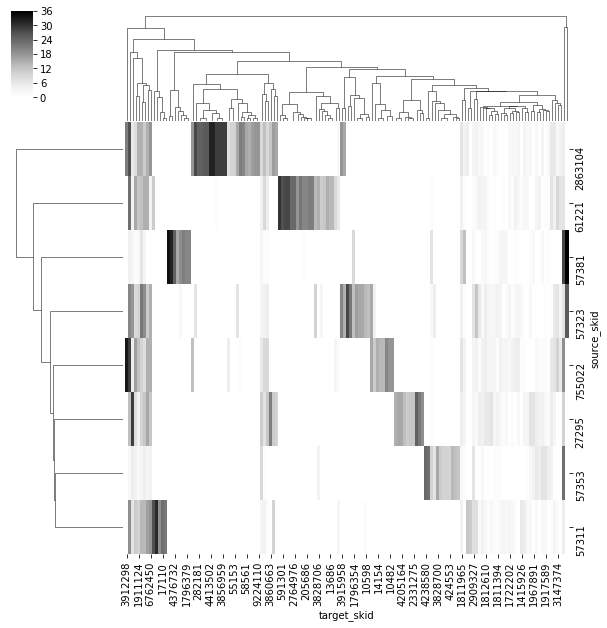

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = sns.clustermap(adj_mat,
                    cmap='Greys')

plt.show()

In [6]:
import networkx as nx
import navis

# Turn the adjacency matrix into a networkX Graph
g = navis.network2nx(adj_mat)

# As example: get the degree centrality for each node
dc = nx.degree_centrality(g)
print('Node centrality for some of the nodes in the network:', dc[755022], dc[2863104], dc[27295])

Node centrality for some of the nodes in the network: 0.9617486338797814 0.9617486338797814 0.9617486338797814


In [7]:
nx.write_graphml(g, 'graph.graphml')